# Resonator Coupling

---

### 0.1 Prerequisite

- When changing the python class in the lib directory please restart kernel.
- When launching the jupyter notebook please always firstly run this cell.

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import constants
import scipy.sparse.linalg
import scipy.sparse as sparse
import qutip.settings as settings
import seaborn as sns
from tqdm import tqdm
import qutip as qt

qt.settings.atol = 1e-100
qt.settings.auto_tidyup_atol = qt.settings.atol

current_dir = os.getcwd()
# Get the parent folder path
parent_dir = os.path.dirname(current_dir)
# Add the parent folder path to sys.path
sys.path.append(parent_dir)

from lib.qubit import qubit
from lib.circuit_res_coupling import circuit_res

# plt.style.use("Solarize_Light2")
# plt.style.use('dark_background')
# plt.style.use('seaborn-whitegrid')
thememap = 'viridis'

# Setting up constants
h = constants.h
hbar = constants.hbar
pi = np.pi

---

## 2. Cavity Coupling

### 2.1 Visualization of the Hamiltonian

In [2]:
# Initialize transmon

# Circuit constant
ng = 0.5
Cc1 = 20e-15
Cc2 = 20e-15

Ej_p = 9e9
Ej_t = 8e9
Cp = 150e-15
Ct = 170e-15
ncut_p = 5
ncut_t = 5

L_res = 5e-9
C_res = 100e-15
m_cut = 5

# Creation of circuit object
system_10 = circuit_res([Cc1, Cc2], C_res, L_res, m_cut, [qubit(Ej_p, [Cp], ng, ncut_p), qubit(Ej_t, [Ct], ng, ncut_t)])

system_10.print_params()


Probe ------------------
Ej:    9.000000000000002 GHz
Ec:    0.12913486216439415 GHz
Cj:    150.0 fF
Ej/Ec : 69.69458014012218
w_01:    2.917205336056951 GHz
ng:    0.5
Target ------------------
Ej:    8.000000000000002 GHz
Ec:    0.11394252543917131 GHz
Cj:    170.0 fF
Ej/Ec : 70.21083628930828
w_01:    2.5840722459470866 GHz
ng:    0.5
wr:    7.11762543417177 Ghz
Cc1:    20.0 fF
Cc2:    20.0 fF
Cr:    100.0 fF
Lr:    5.0 nH
Z0:    223.60679774997897 Ohm


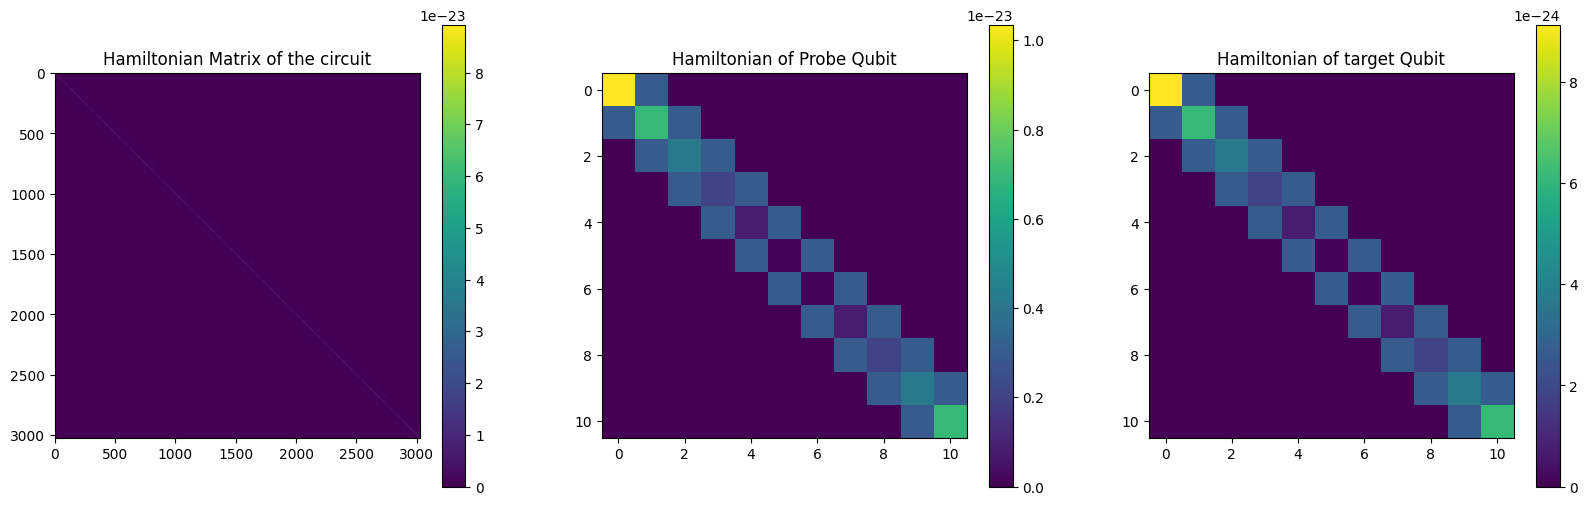

In [3]:
# Exctracting the Hamiltonian
H_circ = system_10.get_H_circuit()
H_p = system_10.get_H_probe()
H_t = system_10.get_H_target()
H_res = system_10.get_H_resonator()

f = plt.figure(figsize=(20,6))

# Plotting the Hamiltonian
ax1 = f.add_subplot(131)
ax1.title.set_text('Hamiltonian Matrix of the circuit')
im1 = ax1.imshow(np.absolute(H_circ.full()), cmap=plt.get_cmap(thememap))
f.colorbar(im1)

ax2 = f.add_subplot(132)
ax2.title.set_text('Hamiltonian of Probe Qubit')
im2 = ax2.imshow(np.absolute(H_p.full()), cmap=plt.get_cmap(thememap))
f.colorbar(im2)


ax3 = f.add_subplot(133)
ax3.title.set_text('Hamiltonian of target Qubit')
im3 = ax3.imshow(np.absolute(H_t.full()), cmap=plt.get_cmap(thememap))
f.colorbar(im3)

# ax4 = f.add_subplot(134)
# ax4.title.set_text('Hamiltonian of resonator')
# im4 = ax4.imshow(np.real(H_res), cmap=plt.get_cmap(thememap))
# f.colorbar(im4)

ax1.grid(False)
ax2.grid(False)
ax3.grid(False)
# ax4.grid(False)

plt.show()

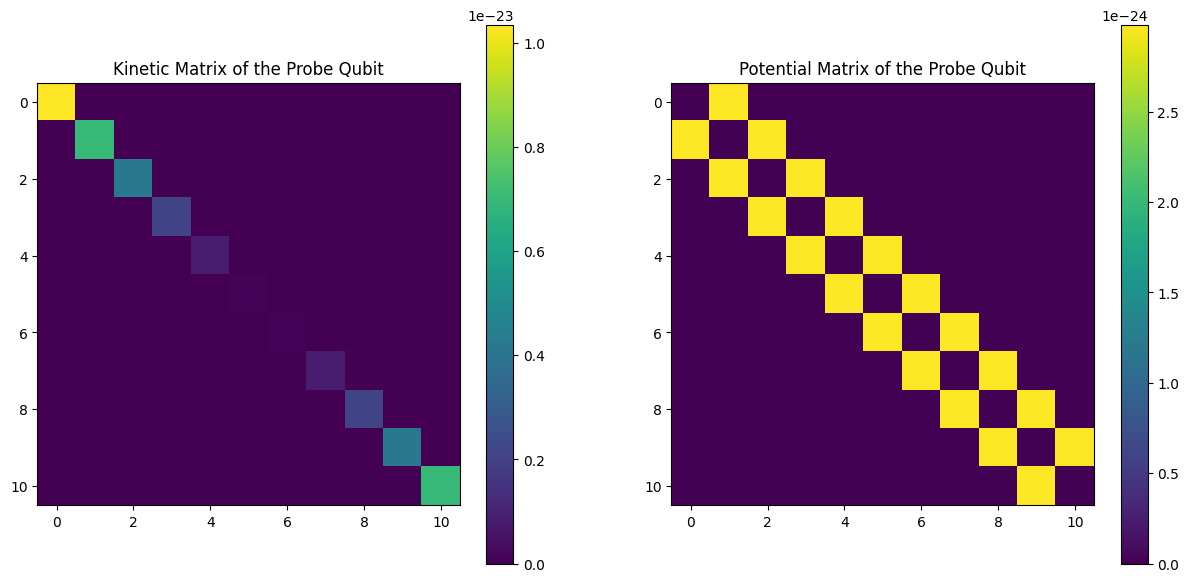

In [4]:
kin_probe = system_10.get_kinetic_probe()
pot_probe = system_10.get_potential_probe()

f = plt.figure(figsize=(15,7))

ax1 = f.add_subplot(121)
ax1.title.set_text('Kinetic Matrix of the Probe Qubit')
im1 = ax1.imshow(np.absolute(kin_probe.full()), cmap=plt.get_cmap(thememap))
f.colorbar(im1)

ax2 = f.add_subplot(122)
ax2.title.set_text('Potential Matrix of the Probe Qubit')
im2 = ax2.imshow(np.absolute(pot_probe.full()), cmap=plt.get_cmap(thememap))
f.colorbar(im2)

ax1.grid(False)
ax2.grid(False)

plt.show()

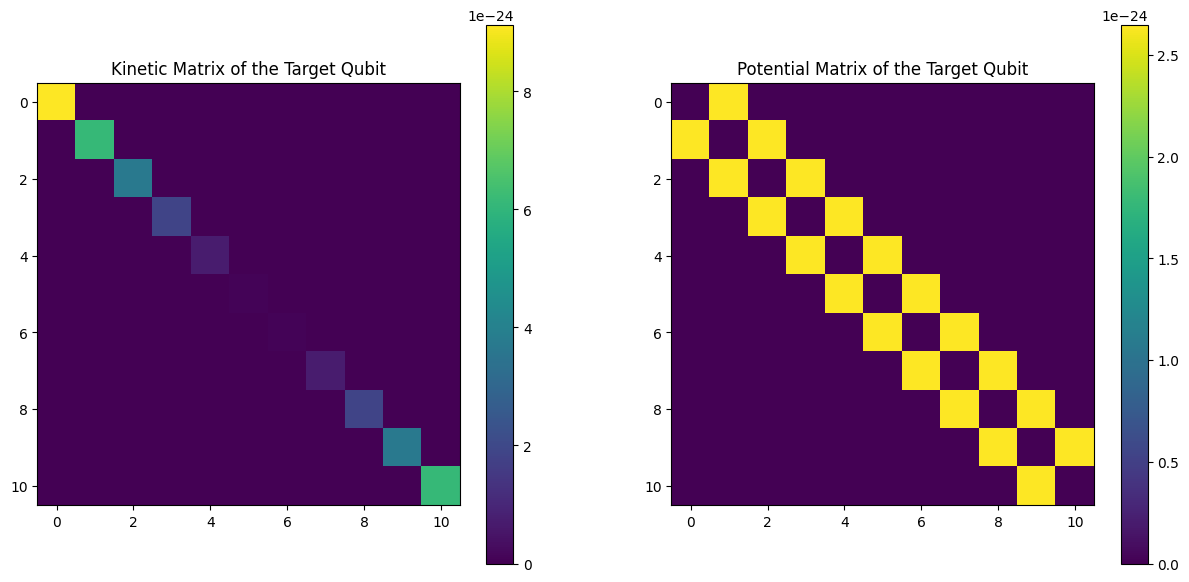

In [5]:
kin_target = system_10.get_kinetic_target()
pot_target = system_10.get_potential_target()

f = plt.figure(figsize=(15,7))

ax1 = f.add_subplot(121)
ax1.title.set_text('Kinetic Matrix of the Target Qubit')
im1 = ax1.imshow(np.absolute(kin_target.full()), cmap=plt.get_cmap(thememap))
f.colorbar(im1)

ax2 = f.add_subplot(122)
ax2.title.set_text('Potential Matrix of the Target Qubit')
im2 = ax2.imshow(np.absolute(pot_target.full()), cmap=plt.get_cmap(thememap))
f.colorbar(im2)
ax1.grid(False)
ax2.grid(False)
plt.show()

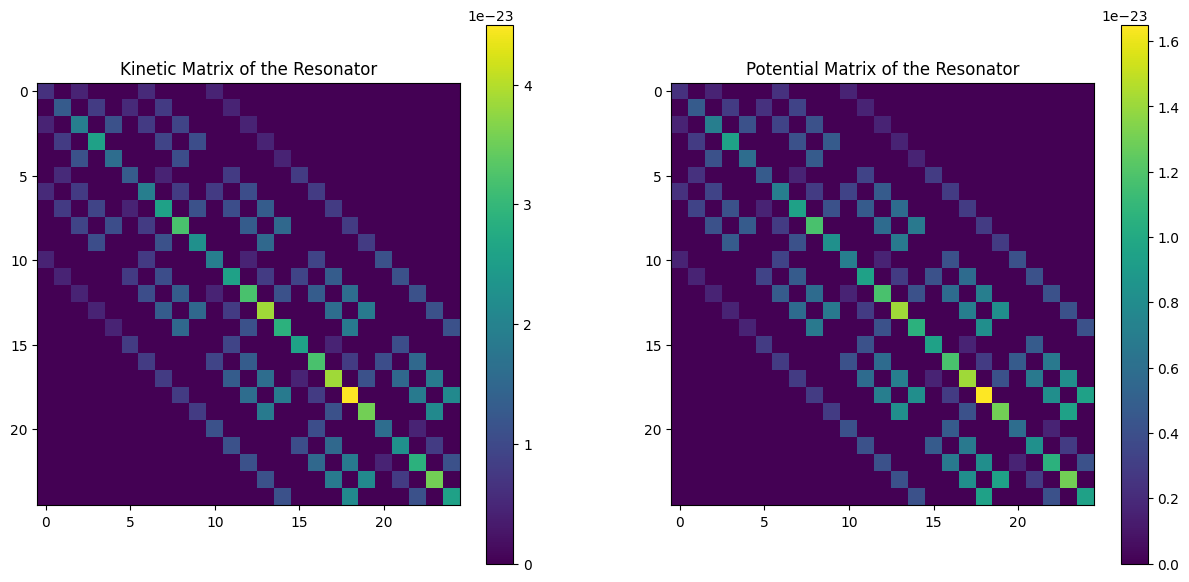

In [6]:
kin_target = system_10.get_kinetic_resonator()
pot_target = system_10.get_potential_resonator()

f = plt.figure(figsize=(15,7))

ax1 = f.add_subplot(121)
ax1.title.set_text('Kinetic Matrix of the Resonator')
im1 = ax1.imshow(np.absolute(kin_target.full()), cmap=plt.get_cmap(thememap))
f.colorbar(im1)

ax2 = f.add_subplot(122)
ax2.title.set_text('Potential Matrix of the Resonator')
im2 = ax2.imshow(np.absolute(pot_target.full()), cmap=plt.get_cmap(thememap))
f.colorbar(im2)
ax1.grid(False)
ax2.grid(False)
plt.show()

### 2.2 Calculate Interaction

#### 2.2.1 Static visualization

Probe ------------------
Ej:    9.000000000000002 GHz
Ec:    0.12913486216439415 GHz
Cj:    150.0 fF
Ej/Ec : 69.69458014012218
w_01:    2.9138875699855906 GHz
ng:    0.5
Target ------------------
Ej:    8.000000000000002 GHz
Ec:    0.11394252543917131 GHz
Cj:    170.0 fF
Ej/Ec : 70.21083628930828
w_01:    2.5810465724626614 GHz
ng:    0.5
wr:    7.11762543417177 Ghz
Cc1:    20.0 fF
Cc2:    20.0 fF
Cr:    100.0 fF
Lr:    5.0 nH
Z0:    223.60679774997897 Ohm
(2, 10)
[[0.04346669+0.j 0.04346669+0.j 0.04346669+0.j 0.04346669+0.j
  0.04346669+0.j 0.04346669+0.j 0.04346668+0.j 0.04346669+0.j
  0.04346461+0.j 0.04346868+0.j]
 [0.04346669+0.j 0.04346669+0.j 0.04346669+0.j 0.04346669+0.j
  0.04346669+0.j 0.04346669+0.j 0.04346668+0.j 0.04346669+0.j
  0.04346461+0.j 0.04346868+0.j]]


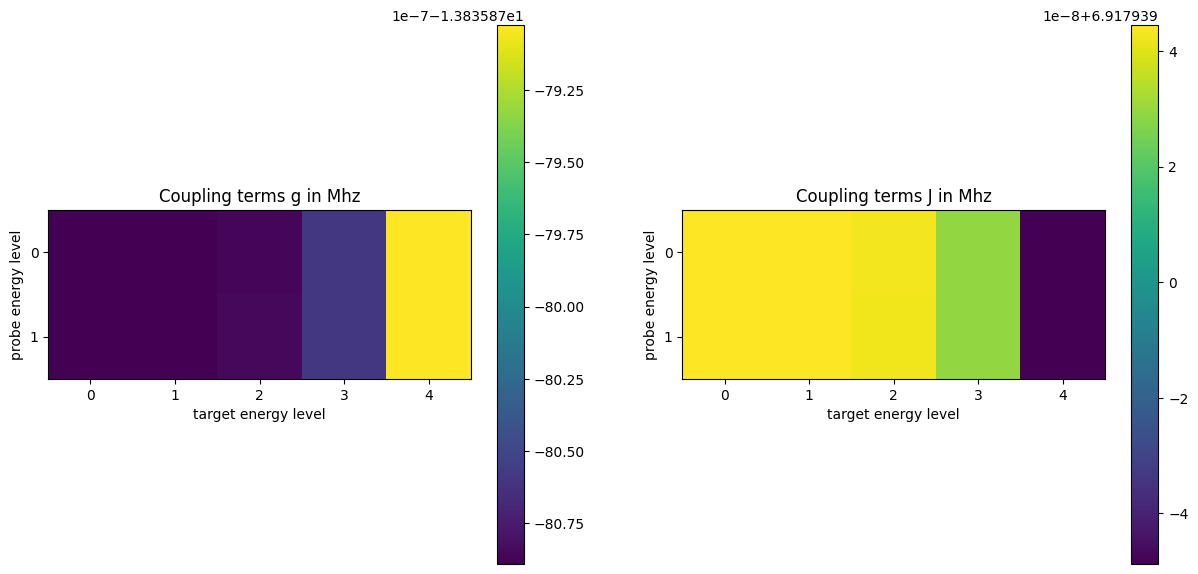

6.917939022437835

In [2]:
# Initialize transmon

# Circuit constant
ng = 0.5
Cc1 = 20e-15
Cc2 = 20e-15

Ej_p = 9e9
Ej_t = 8e9
Cp = 150e-15
Ct = 170e-15
ncut_p = 10
ncut_t = 10

L_res = 5e-9
C_res = 100e-15
m_cut = 10

# Creation of circuit object
system_2= circuit_res([Cc1, Cc2], C_res, L_res, m_cut, [qubit(Ej_p, [Cp], ng, ncut_p), qubit(Ej_t, [Ct], 0.5, ncut_t)])

system_2.print_params()

J_matrix = system_2.get_J()
print(J_matrix.shape)
print(J_matrix * 1e-9 / constants.hbar)

f = plt.figure(figsize=(15,7))

ax1 = f.add_subplot(121)
ax1.title.set_text('Coupling terms g in Mhz')
im1 = ax1.imshow(-2* np.real(J_matrix[:,0:5]) * 1e-6 / constants.h, cmap=plt.get_cmap(thememap))
ax1.set_xticks(np.arange(0, 5, 1))
ax1.set_xlabel('target energy level')
ax1.set_yticks(np.arange(0, 2, 1))
ax1.set_ylabel('probe energy level')
f.colorbar(im1)

ax2 = f.add_subplot(122)
ax2.title.set_text('Coupling terms J in Mhz')
im2 = ax2.imshow(np.real(J_matrix[:,0:5]) * 1e-6 / constants.h, cmap=plt.get_cmap(thememap))
ax2.set_xticks(np.arange(0, 5, 1))
ax2.set_xlabel('target energy level')
ax2.set_ylabel('probe energy level')
ax2.set_yticks(np.arange(0, 2, 1))
f.colorbar(im2)

plt.show()

np.mean(np.real(J_matrix[:,0:5]) * 1e-6 / constants.h)



#### 2.2.2 Coupling regarding defining parameters

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:03<00:00,  3.19it/s]


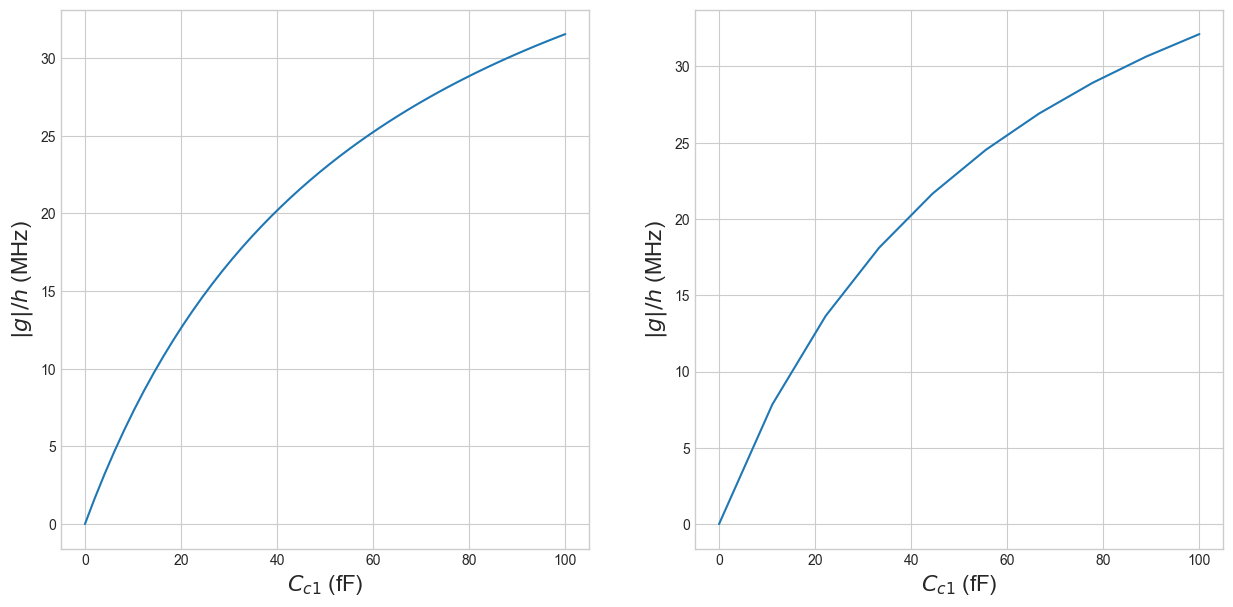

In [10]:
# Circuit constant
ng = 0.5
Cc1 = 20e-15
Cc2 = 20e-15

Ej_p = 9e9
Ej_t = 8e9
Cp = 150e-15
Ct = 170e-15
ncut_p = 5
ncut_t = 5

L_res = 5e-9
C_res = 100e-15
m_cut = 5


# Creation of circuit object
system_3= circuit_res([Cc1, Cc2], C_res, L_res, m_cut, [qubit(Ej_p, [Cp], ng, ncut_p), qubit(Ej_t, [Ct], 0.5, ncut_t)])

Ccs_1 = np.linspace(0, 10e-14, 50)

fig_data_1 = []

for Cc in tqdm(Ccs_1):
    system_3.Cc1 = Cc

    # Full Hamiltonina Approach
    J_matrix = system_3.get_J(update=True)
    fig_data_1.append(J_matrix)

Ccs_2 = np.linspace(0, 10e-14, 10)
system_3.Cc1 = 20e-15
fig_data_2 = []

for Cc in tqdm(Ccs_2):
    system_3.Cc2 = Cc

    # Full Hamiltonina Approach
    J_matrix = system_3.get_J(update=True)
    fig_data_2.append(J_matrix)

pparam = dict(xlabel='$C_{c1}$ (fF)', ylabel='$| g | / h$ (MHz)')

with plt.style.context([]):
    fig = plt.figure(figsize=(15,7))
    ax1 = fig.add_subplot(121)
    ax1.plot([val * 1e15 for val in Ccs_1], [2 * np.mean(np.real(J_matrix)) * 1e-6 / h for J_matrix in fig_data_1])
    ax1.set(**pparam)
    ax1.xaxis.label.set_size(16)
    ax1.yaxis.label.set_size(16)

    ax2 = fig.add_subplot(122)
    ax2.plot([val * 1e15 for val in Ccs_2], [2 * np.mean(np.real(J_matrix)) * 1e-6 / h for J_matrix in fig_data_2])
    ax2.set(**pparam)
    ax2.xaxis.label.set_size(16)
    ax2.yaxis.label.set_size(16)

    pparam = dict(xlabel='$C_{c1}$ (fF)', ylabel='$| g | / h$ (MHz)')

    plt.show()

Probe ------------------
Ej:    9.000000000000002 GHz
Ec:    0.12913486216439415 GHz
Cj:    150.0 fF
Ej/Ec : 69.69458014012218
w_01:    2.917205336056951 GHz
ng:    0.5
Target ------------------
Ej:    8.000000000000002 GHz
Ec:    0.11394252543917131 GHz
Cj:    170.0 fF
Ej/Ec : 70.21083628930828
w_01:    2.5840722459470866 GHz
ng:    0.5
wr:    7.11762543417177 Ghz
Cc1:    20.0 fF
Cc2:    20.0 fF
Cr:    100.0 fF
Lr:    5.0 nH
Z0:    223.60679774997897 Ohm


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:34<00:00,  2.91it/s]


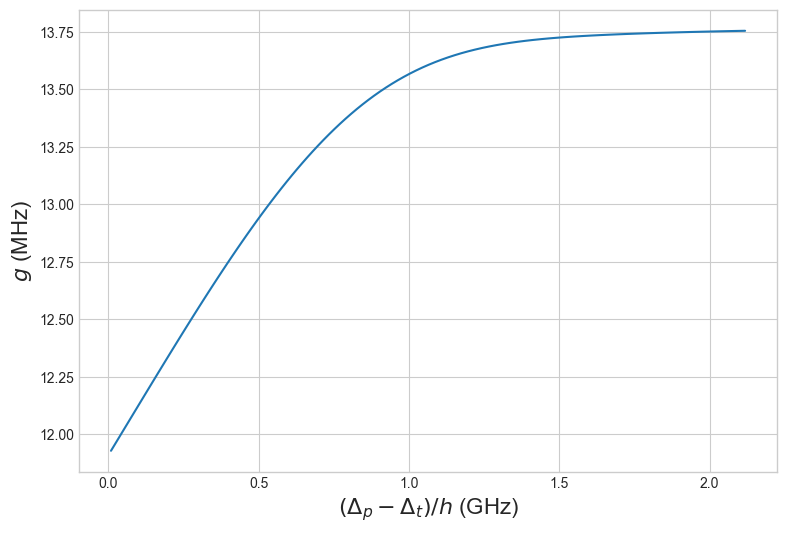

In [12]:
# Circuit constant
ng = 0.5
Cc1 = 20e-15
Cc2 = 20e-15

Ej_p = 9e9
Ej_t = 8e9
Cp = 150e-15
Ct = 170e-15
ncut_p = 5
ncut_t = 5

L_res = 5e-9
C_res = 100e-15
m_cut = 5


# Creation of circuit object
system_4= circuit_res([Cc1, Cc2], C_res, L_res, m_cut, [qubit(Ej_p, [Cp], ng, ncut_p), qubit(Ej_t, [Ct], ng, ncut_t)])

system_4.print_params()

# fig_pt_detuning_Ejt = np.linspace(8.5e9, 27e9, 20)
fig_data_Ejt = np.linspace(1e9, 10e9, 100)
fig_data_g = []
fig_data_detuning = []



for Ejt in tqdm(fig_data_Ejt):
    system_4.target.Ej = Ejt * h

    # Full Hamiltonina Approach
    g = 2 * np.mean(np.real(system_4.get_J(update=True)))
    fig_data_g.append(g)
    
    detunning = system_4.get_detuning_pt(update=True)
    fig_data_detuning.append(detunning)

pparam = dict(xlabel='$(\\Delta_p - \\Delta_t) / h$ (GHz)', ylabel='$g$ (MHz)')

with plt.style.context([]):
    fig, ax = plt.subplots(figsize=(9,6))
    ax.plot([fig_data_detuning[idx] * 1e-9 / h for idx in range(len(fig_data_Ejt))], [np.abs(g) * 1e-6 / h for g in fig_data_g])
    ax.set(**pparam)
    plt.legend()
    ax.xaxis.label.set_size(16)
    ax.yaxis.label.set_size(16)

    plt.show() 



